# How are in demand skills trendiing for data analysts?

**Methodology**

1. Aggregate skill counts monthly
2. Re-analyze based on percentage of total jobs
3. Plot the monthly skill demand

In [1]:
# import ast , pandas, seaborn, datasets , matplotlib
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

In [2]:
# load the data 
data = load_dataset("lukebarousse/data_jobs")

In [3]:
# convert data to pandas dataframe
df = data['train'].to_pandas()

In [4]:
# data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

In [5]:
# copy the df to df_DA_US with job_title = Data Analyst and job_country = United States
df_DA_US = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [6]:
# create new col named job_posted_month_no to extract month from job_posted_date
df_DA_US['job_posted_month_no'] = df_DA_US['job_posted_date'].dt.month

In [7]:
# explode job_skills and assign it to new var called df_DA_US_explode
df_DA_US_explode = df_DA_US.explode('job_skills')

In [9]:
# make a pivot table
df_DA_US_pivot = df_DA_US_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)


In [10]:
df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


In [11]:
# create a new row named total that sum up each col
df_DA_US_pivot.loc['Total'] = df_DA_US_pivot.sum()

In [12]:
df_DA_US_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,assembly,...,vmware,vue,watson,webex,windows,wire,word,workfront,yarn,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,12,0,53,0,1,0,0,1,1,8,...,2,0,0,2,10,0,169,0,0,3
2,13,0,34,1,2,0,0,4,2,7,...,0,5,1,1,21,1,128,0,0,2
3,11,0,41,1,3,0,0,6,2,4,...,1,2,0,2,14,3,142,0,0,4
4,5,0,57,1,0,0,0,1,0,1,...,2,0,0,1,24,4,143,1,0,2
5,6,1,35,0,3,0,0,1,2,1,...,0,0,0,1,20,0,92,0,0,1
6,10,3,33,1,1,0,2,0,0,4,...,1,0,0,0,15,2,126,0,0,2
7,13,0,33,0,1,0,0,1,0,4,...,0,0,0,0,15,2,101,0,1,0
8,9,2,29,0,0,0,0,0,0,14,...,0,0,0,1,15,1,112,0,0,5
9,7,0,19,1,0,1,0,2,0,0,...,2,0,0,0,11,0,65,0,0,2


In [14]:
# sort the df_DA_US_pivot base on total DESC using loc
df_DA_US_pivot = df_DA_US_pivot[df_DA_US_pivot.loc['Total'].sort_values(ascending=False).index]

In [15]:
df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,0,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,1,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,1,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,0,0,0,0,0,0,1,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,1,0,0,0


In [16]:
# let drop the total raw
df_DA_US_pivot = df_DA_US_pivot.drop('Total')

In [17]:
df_DA_US_pivot

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1138,781,646,529,326,394,338,169,176,164,...,0,0,0,0,0,0,0,0,0,0
2,782,544,408,378,302,270,233,128,130,99,...,0,0,0,0,0,0,0,0,0,0
3,802,580,463,400,277,300,241,142,127,107,...,0,0,0,0,0,0,0,0,0,0
4,845,577,462,421,292,258,238,143,133,122,...,1,0,0,0,0,0,0,0,0,0
5,706,490,367,336,251,206,219,92,119,98,...,0,0,0,0,0,0,0,0,0,0
6,742,491,395,396,272,202,252,126,116,99,...,0,0,0,0,1,0,0,0,0,0
7,560,431,296,292,190,182,188,101,101,62,...,0,0,0,0,0,0,0,0,1,1
8,784,641,480,460,292,272,321,112,133,98,...,0,0,0,0,0,0,0,0,0,0
9,485,336,277,253,183,150,157,65,53,67,...,0,0,0,0,0,0,1,0,0,0


<Axes: xlabel='job_posted_month_no'>

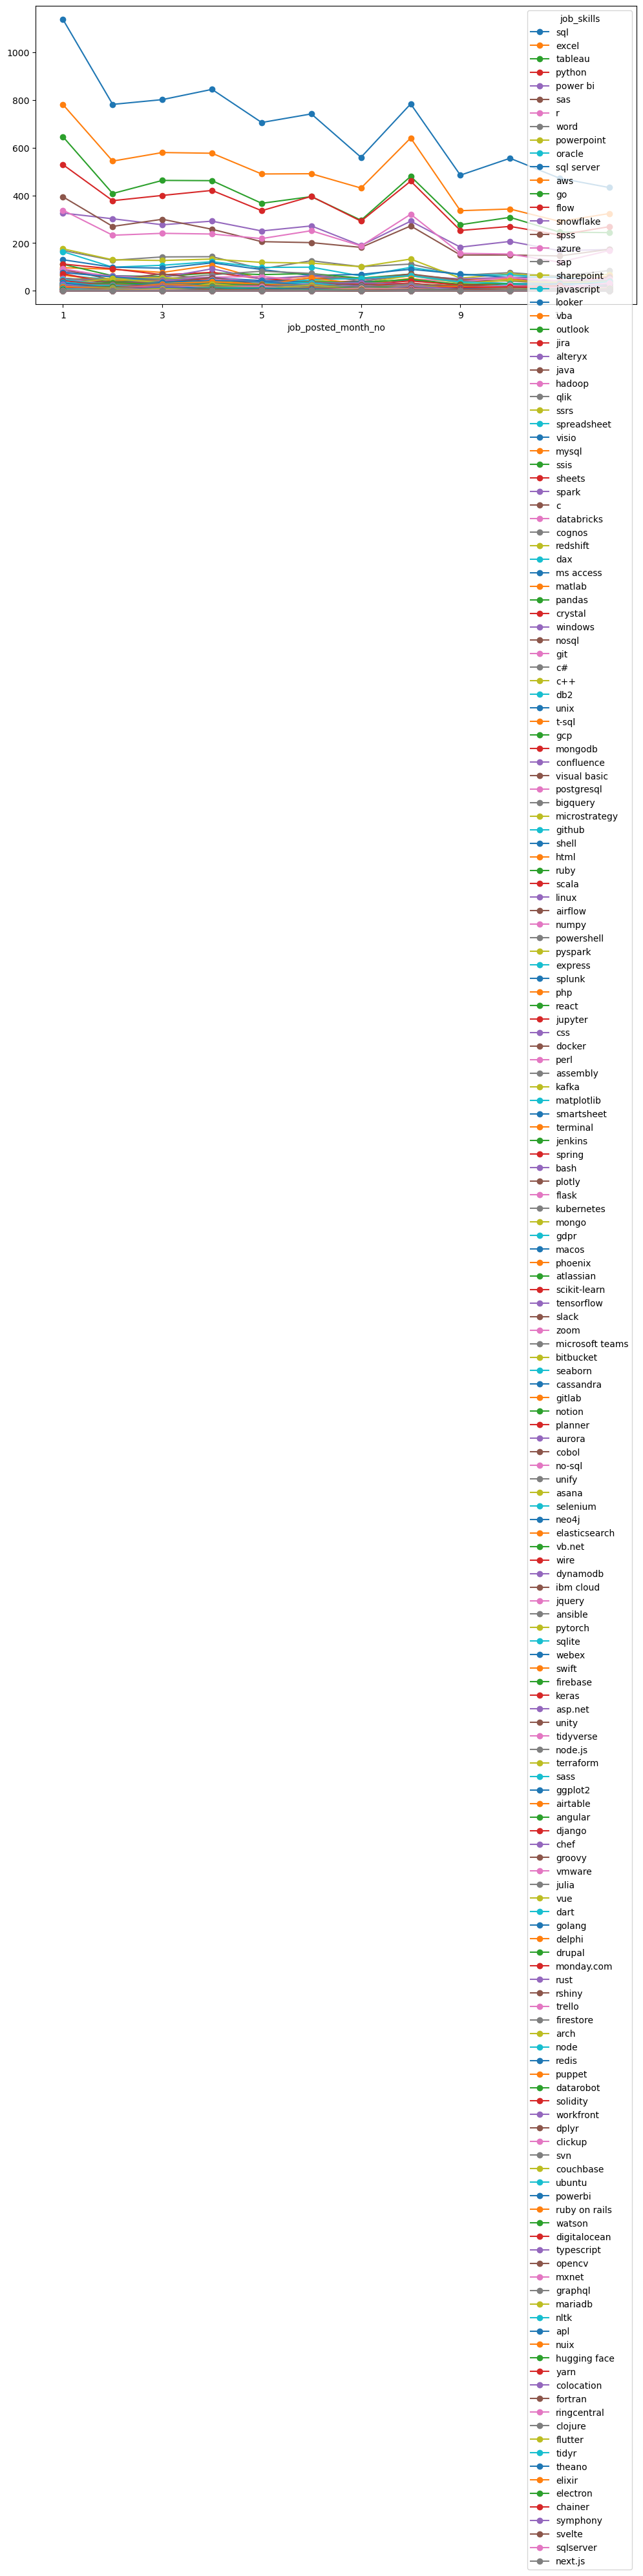

In [18]:
# plot line chart
df_DA_US_pivot.plot(kind='line', figsize=(12, 6), marker='o')

In [20]:
# lets size the job_posted_month_no of df_DA_US 
DA_totals = df_DA_US.groupby('job_posted_month_no').size()

In [30]:
# lets make the df_DA_US.pivot devided by DA_totals
df_DA_US_percent = df_DA_US_pivot.div(DA_totals/100, axis=0) 


In [31]:
df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.073046,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
6,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.000000,0.0000,0.000000,0.000000,0.08285,0.000000,0.000000,0.000000,0.000000,0.000000
7,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.104712,0.104712
8,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
9,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.116822,0.000000,0.000000,0.000000


In [32]:
# change month number to month name
df_DA_US_percent = df_DA_US_percent.reset_index()
df_DA_US_percent['job_posted_month'] = df_DA_US_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_US_percent = df_DA_US_percent.drop(columns='job_posted_month_no')

In [33]:
df_DA_US_percent

job_skills,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,oracle,...,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js,job_posted_month
0,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,9.030837,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,Jan
1,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,7.710280,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,Feb
2,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,7.856094,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,Mar
3,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,8.911614,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,Apr
4,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,8.477509,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,May
5,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,8.202154,...,0.0000,0.000000,0.000000,0.08285,0.000000,0.000000,0.000000,0.000000,0.000000,Jun
6,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,6.492147,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.104712,0.104712,Jul
7,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,6.930693,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,Aug
8,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,7.827103,...,0.0000,0.000000,0.000000,0.00000,0.000000,0.116822,0.000000,0.000000,0.000000,Sep
9,55.489022,34.231537,30.738523,26.946108,20.658683,14.970060,15.369261,7.584830,7.085828,6.586826,...,0.0998,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,Oct


In [45]:
# change job_posted_month to be first col
df_DA_US_percent = df_DA_US_percent[['job_posted_month'] + [col for col in df_DA_US_percent.columns if col != 'job_posted_month']]

In [53]:
df_DA_US_percent

job_skills,job_posted_month,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
0,Jan,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Feb,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Apr,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,...,0.073046,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Jun,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,...,0.000000,0.0000,0.000000,0.000000,0.08285,0.000000,0.000000,0.000000,0.000000,0.000000
6,Jul,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.104712,0.104712
7,Aug,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Sep,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.116822,0.000000,0.000000,0.000000
9,Oct,55.489022,34.231537,30.738523,26.946108,20.658683,14.970060,15.369261,7.584830,7.085828,...,0.000000,0.0998,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [51]:
df_DA_US_percent

job_skills,job_posted_month,sql,excel,tableau,python,power bi,sas,r,word,powerpoint,...,flutter,tidyr,theano,elixir,electron,chainer,symphony,svelte,sqlserver,next.js
0,Jan,62.665198,43.006608,35.572687,29.129956,17.951542,21.696035,18.612335,9.306167,9.691630,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Feb,60.903427,42.367601,31.775701,29.439252,23.520249,21.028037,18.146417,9.968847,10.124611,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Mar,58.883994,42.584435,33.994126,29.368576,20.337739,22.026432,17.694567,10.425844,9.324523,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Apr,61.723886,42.147553,33.747261,30.752374,21.329438,18.845873,17.384953,10.445581,9.715121,...,0.073046,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
4,May,61.072664,42.387543,31.747405,29.065744,21.712803,17.820069,18.944637,7.958478,10.294118,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Jun,61.474731,40.679370,32.725766,32.808616,22.535211,16.735708,20.878210,10.439105,9.610605,...,0.000000,0.0000,0.000000,0.000000,0.08285,0.000000,0.000000,0.000000,0.000000,0.000000
6,Jul,58.638743,45.130890,30.994764,30.575916,19.895288,19.057592,19.685864,10.575916,10.575916,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.104712,0.104712
7,Aug,55.445545,45.332390,33.946252,32.531825,20.650636,19.236209,22.701556,7.920792,9.405941,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Sep,56.658879,39.252336,32.359813,29.556075,21.378505,17.523364,18.341121,7.593458,6.191589,...,0.000000,0.0000,0.000000,0.000000,0.00000,0.000000,0.116822,0.000000,0.000000,0.000000
9,Oct,55.489022,34.231537,30.738523,26.946108,20.658683,14.970060,15.369261,7.584830,7.085828,...,0.000000,0.0998,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [48]:
# get the first 5 using iloc
df_plot = df_DA_US_percent.iloc[:, :5]

In [49]:
df_plot

job_skills,job_posted_month,sql,excel,tableau,python
0,Jan,62.665198,43.006608,35.572687,29.129956
1,Feb,60.903427,42.367601,31.775701,29.439252
2,Mar,58.883994,42.584435,33.994126,29.368576
3,Apr,61.723886,42.147553,33.747261,30.752374
4,May,61.072664,42.387543,31.747405,29.065744
5,Jun,61.474731,40.679370,32.725766,32.808616
6,Jul,58.638743,45.130890,30.994764,30.575916
7,Aug,55.445545,45.332390,33.946252,32.531825
8,Sep,56.658879,39.252336,32.359813,29.556075
9,Oct,55.489022,34.231537,30.738523,26.946108


Text(0, 0.5, 'Percentage (%)')

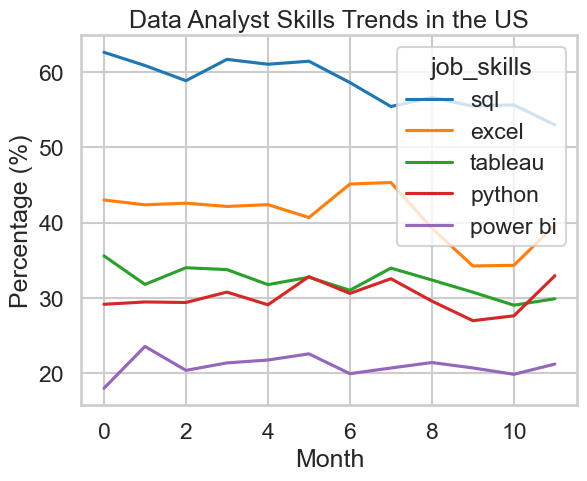

In [44]:
# plot df_plot witn seabon
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style="whitegrid", context="talk", palette="deep")

plt.title('Data Analyst Skills Trends in the US')
plt.xlabel('Month')
plt.ylabel('Percentage (%)')